Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [4]:
library(tidyverse)
library(tidymodels)



-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.4.2     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.1
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
-- Attaching packages -------------------------------------- tidymodels 1.1.0 --

v broom        1.0.5     v rsample      1.1.1
v dials        1.2.0     v tune         1.1.1
v infer        1.0.4     v workflows    1.1.3
v modeldata    1.1.0     v workflowsets 1.0.1
v parsnip      1.1.0     v yardstick    1.3.1
v recipes      1.0.6     

-- Conflicts ----------------------------------------- tidymodels_conflicts() --
x scales::discard() masks purrr::discard()
x dplyr::filt

The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [6]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
-- Column specification --------------------------------------------------------
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [8]:
glimpse(diabetes_train)

Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 1, 10, 4, 10, 1, 13, 5, 3, 6, 10, 4, 11, 7~
$ Glucose                  <dbl> 85, 89, 115, 110, 139, 103, 145, 109, 88, 92,~
$ BloodPressure            <dbl> 66, 66, 0, 92, 80, 30, 82, 75, 58, 92, 78, 60~
$ SkinThickness            <dbl> 29, 23, 0, 0, 0, 38, 19, 26, 11, 0, 31, 33, 0~
$ Insulin                  <dbl> 0, 94, 0, 0, 0, 83, 110, 0, 54, 0, 0, 192, 0,~
$ BMI                      <dbl> 26.6, 28.1, 35.3, 37.6, 27.1, 43.3, 22.2, 36.~
$ DiabetesPedigreeFunction <dbl> 0.351, 0.167, 0.134, 0.191, 1.441, 0.183, 0.2~
$ Age                      <dbl> 31, 21, 29, 30, 57, 33, 57, 60, 22, 28, 45, 3~
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ~


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:** Anything with 0 and 1 values as they are binary. 0 could mean not diabetic, and 1 could mean diabetic. So the variable we can look at in the glimpse dataset would be the Outcome variable. 

Anything with 0 and 1 values as they are binary. 0 could mean not diabetic, and 1 could mean diabetic. So the variable we can look at in the glimpse dataset would be the Outcome variable. 

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     |Plasma glucose concentration a 2 hours in an oral glucose tolerance test|
| BMI         | Body mass index (weight in kg/(height in m)^2)|

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

In [ ]:
diabetes_train |>

    ggplot(aes(x = Outcome)) +
        geom_bar() +
        labs(title = "Distribution of Diabetes Outcomes",
            x = "Outcome",
            y = "Count")


    

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:** The data is not balanced as there are more nos (0) and yes (1).


The data is not balanced as there are more nos (0) and yes (1).


Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [22]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,89.0
0,BMI,28.1
0,Glucose,115.0
0,BMI,35.3


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

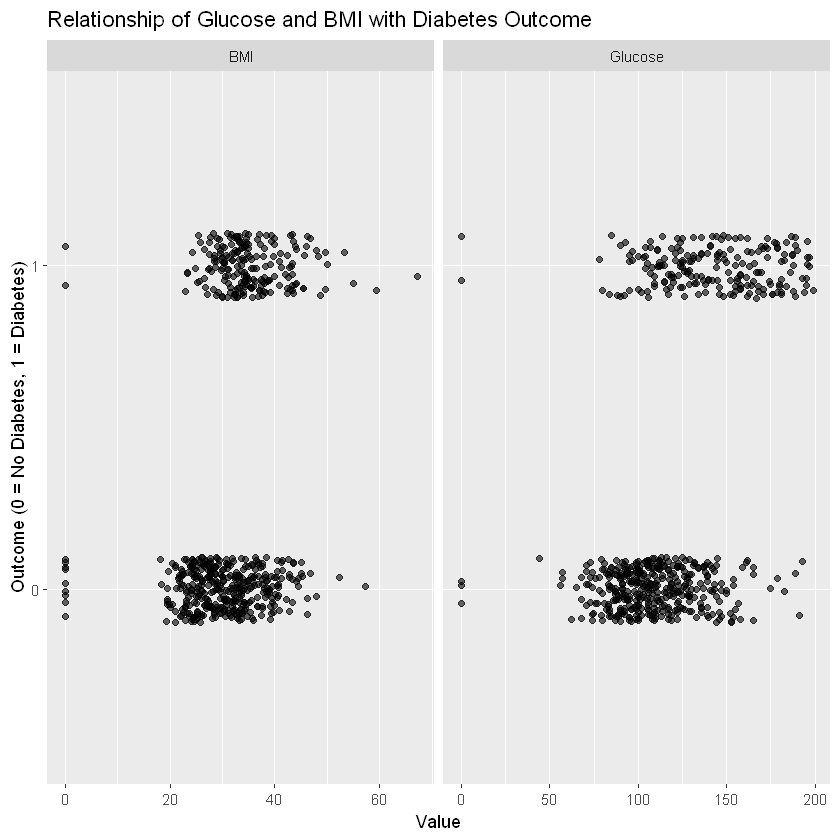

In [40]:
ggplot(plot_df, aes(x = value, y = Outcome)) +
  geom_jitter(alpha = 0.6, height = 0.1) +
  facet_wrap(~name, ncol = 2, scales = 'free_x') +
  labs(title = "Relationship of Glucose and BMI with Diabetes Outcome",
       x = "Value", 
       y = "Outcome (0 = No Diabetes, 1 = Diabetes)",
       color = "Outcome") 


❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**

In [ ]:
Detail is loss and the data gets compressed to the left portion of the plot. 

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [52]:
rec = recipe(Outcome ~ BMI + Glucose, data = diabetes_train) 

rec_prepped = prep(rec, diabetes_train)

mod = logistic_reg() |>
    set_engine('glm')

mod_fit = mod|>
    fit(Outcome ~ BMI + Glucose, juice(rec_prepped))

mod_fit

parsnip model object


Call:  stats::glm(formula = Outcome ~ BMI + Glucose, family = stats::binomial, 
    data = data)

Coefficients:
(Intercept)          BMI      Glucose  
   -7.48812      0.07129      0.03645  

Degrees of Freedom: 575 Total (i.e. Null);  573 Residual
Null Deviance:	    745.1 
Residual Deviance: 570.1 	AIC: 576.1

Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [54]:
diabetes_with_pred = augment(mod_fit, diabetes_test)

diabetes_with_pred |> head()



Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,.pred_class,.pred_0,.pred_1
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>
0,137,40,35,168,43.1,2.288,33,1,1,0.3593368,0.6406632
5,116,74,0,0,25.6,0.201,30,0,0,0.8076410,0.1923590
7,100,0,0,0,30.0,0.484,32,1,0,0.8460994,0.1539006
0,118,84,47,230,45.8,0.551,31,1,1,0.4804786,0.5195214
3,126,88,41,235,39.3,0.704,27,0,0,0.5233869,0.4766131
8,99,84,0,0,35.4,0.388,50,0,0,0.7950825,0.2049175


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [56]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 108  31
         1  17  36

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:**


67 indiviudals had diabetes
36 were predicted to have diabetes that actually had diabetes
17 had false positives

